In [1]:
!date

Sun Mar 19 21:16:52 EDT 2023


In [2]:
#genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
target = 'CYP2D6'

In [3]:
#pip install umap-learn

In [3]:
# ! pip install rdkit-pypi
# ! pip install --pre deepchem
# ! pip install umap
# ! pip install llvmlite==0.35.0  --ignore-installed
# ! pip install umap-learn
# ! pip install molvs
# ! pip install bravado

In [4]:
# import deepchem as dc
# dc.__version__
# # get the Install AMPL_GPU_test.sh
# ! wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh' >& /dev/null

# # run the script to install AMPL
# ! chmod u+x install_AMPL_GPU_test.sh
# ! ./install_AMPL_GPU_test.sh

In [5]:
# # mount your google drive where input files are located 
# # this will ask you for permission to access your google drive. go ahed and allow 
# from google.colab import drive
# drive.mount('/content/gdrive')

# # view contents of google drive 
# %ls /content/gdrive/MyDrive/MoDaC/NCI_DOE_Archive/ATOM/safety_screening/Safety_Screen_Targets/

In [4]:
root_dir = './../MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
home_dir = root_dir + target.upper() + '-ampl-1.1.0/'

# root_dir = '/content/gdrive/MyDrive/MoDaC/NCI_DOE_Archive/ATOM/safety_screening/Safety_Screen_Targets/'
# home_dir = root_dir + target.upper() + '-ampl-1.1.0/'
!ls $home_dir

B9FDFB00
CHEMBL25-CYP2D6_human_IC50_26Nov2019.txt
cyp2d6_chembl_smiles_active.csv
cyp2d6_chembl_smiles_active_th5.csv
cyp2d6_chembl_testset_base_smiles_union_active.csv
cyp2d6_chembl_testset_base_smiles_union.csv
CYP2D6_curated.csv
CYP2D6_curated_train_valid_test_scaffold_0f84c002-8d4f-408b-a50f-e3fcba80ca4c.csv
cyp2d6_dtc_smiles_active.csv
cyp2d6_dtc_smiles_active_th5.csv
cyp2d6_dtc_smiles.csv
cyp2d6_dtc_testset_base_smiles_union_active.csv
cyp2d6_dtc_testset_base_smiles_union.csv
cyp2d6_excape_smiles_active.csv
cyp2d6_excape_smiles_active_th5.csv
cyp2d6_excape_smiles.csv
cyp2d6_excape_testset_base_smiles_union_active.csv
cyp2d6_excape_testset_base_smiles_union.csv
CYP2D6_merged
CYP2D6_merged.csv
CYP2D6_reject_IC50.csv
cyp2d6_union_testset_base_smiles.csv
cyp2d6_union_test_smiles_active.csv
cyp2d6_union_test_smiles_active_th5.csv
cyp2d6_union_trainset_base_smiles.csv
cyp2d6_union_trainset_base_smiles_train_valid_test_scaffold_4cb49d5e-1882-474e-ae0b-781d77a4738a.csv
cyp2d6_union_train

In [5]:
# manipulate data
import pandas as pd

# plot data
import numpy as np
import matplotlib.pyplot as plt

# curate data
import atomsci.ddm.utils.struct_utils as struct_utils
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp

# visualize compound structures
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

# visualize data
import seaborn as sns
sns.set_context('poster')
import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [6,4]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))
print("Imports Done.")

Imports Done.


## Reading files for each Target 

In [6]:
# chembl train set (curated, before union)
chembl_df = pd.read_csv(home_dir + 'CHEMBL25-'+target.upper() + '_human_IC50_26Nov2019.txt', sep=";")
chembl = chembl_df['Smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(chembl), len(set(chembl)))
#chembl_df.head(2)

5796 5423


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1290041,NaN,0,452.48,0.0,4.97,4g,FC(F)(F)c1ccc(cc1)C2=CC(=O)N(C=C2)c3ccc4c(cnn4...,IC50,'>',10000000.0,nM,NaN,Outside typical range,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1293112,Inhibition of CYP2D6,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1287674,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,NaN
1,CHEMBL1289283,NaN,0,414.51,0.0,3.86,7b,O=C1C=C(OCc2ccccc2)C=CN1c3ccc4c(cnn4CCN5CCCC5)c3,IC50,'>',10000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1292302,Inhibition of CYP2D6,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1287684,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,NaN


In [12]:
chembl_test_df = pd.read_csv(home_dir + target.lower() + '_chembl_testset_base_smiles_union.csv')
chembl_test = chembl_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(chembl_test), len(set(chembl_test)))
#chembl_test_df.head(2)

722 722


In [13]:
# chrm1
dtc_df = pd.read_csv(home_dir + target.lower() + '_dtc_smiles.csv')
dtc = dtc_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()

#chrm2
#dtc_df = pd.read_csv(home_dir + gene.lower() + '_dtc_base_smiles_all.csv')
#dtc = dtc_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()

print(len(dtc), len(set(dtc)))
#dtc_df.head(2)

3834 3444


In [14]:
dtc_test_df = pd.read_csv(home_dir + target.lower() + '_dtc_testset_base_smiles_union.csv')
dtc_test = dtc_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(dtc_test), len(set(dtc_test)))
#dtc_test_df.head(2)

404 404


In [15]:
excape_df = pd.read_csv(home_dir + target.lower() + '_excape_smiles.csv')
excape = excape_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(excape), len(set(excape)))
#excape_df.head(2)

7961 7894


In [16]:
#CHRM3 does not have excape_test
excape_test_df = pd.read_csv(home_dir + target.lower() + '_excape_testset_base_smiles_union.csv')
excape_test = excape_test_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles).to_list()
print(len(excape_test), len(set(excape_test)))
#excape_test_df.head(2)

1191 1191


In [17]:
union_train_df = pd.read_csv(home_dir + target.lower() + '_union_trainset_base_smiles.csv')
union_train = union_train_df['base_rdkit_smiles'].to_list()
print(len(union_train), len(set(union_train)))
#union_train_df.head(2)

10445 10445


In [18]:
union_test_df = pd.read_csv(home_dir + target.lower() + '_union_testset_base_smiles.csv')
union_test = union_test_df['base_rdkit_smiles'].to_list()
print(len(union_test), len(set(union_test)))
#union_test_df.head(2)

1843 1843


In [19]:
# intersection = set(union_train).intersection(set(dtc), set(excape), set(chembl))
# print(len(intersection))

intersection = set(union_test).intersection(set(chembl))
print("\nunion_test AND chembl=", len(intersection), "\tunion_test=", len(set(union_test)), "\tchembl=", len(set(chembl)))
intersection = set(union_test).intersection(set(chembl_test))
print("union_test AND chembl_test=", len(intersection), "\tunion_test=", len(set(union_test)), "\tchembl_test=", len(set(chembl_test)))

intersection = set(union_test).intersection(set(dtc))
print("\nunion_test AND dtc=", len(intersection), "\tunion_test=", len(set(union_test)), "\tdtc=", len(set(dtc)))
intersection = set(union_test).intersection(set(dtc_test))
print("union_test AND dtc_test=", len(intersection),"\tunion_test=", len(set(union_test)), "\tdtc_test=", len(set(dtc_test)))


intersection = set(union_test).intersection(set(excape))
print("\nunion_test AND excape=", len(intersection), "\tunion_test=", len(set(union_test)), "\texcape=", len(set(excape)))
intersection = set(union_test).intersection(set(excape_test))
print("union_test AND excape_test=", len(intersection), "\tunion_test=", len(set(union_test)), "\texcape_test=", len(set(excape_test)))


union_test AND chembl= 747 	union_test= 1843 	chembl= 5423
union_test AND chembl_test= 129 	union_test= 1843 	chembl_test= 722

union_test AND dtc= 404 	union_test= 1843 	dtc= 3444
union_test AND dtc_test= 50 	union_test= 1843 	dtc_test= 404

union_test AND excape= 1166 	union_test= 1843 	excape= 7894
union_test AND excape_test= 169 	union_test= 1843 	excape_test= 1191


In [ ]:
# # check if 30% of dtc and dtc_test are same or not 
# #excape_test = list(set(union_test).intersection(set(excape)))
# print("dtc=", len(set(dtc)), "\t30%=",np.floor(len(set(dtc))*.30), "\tdtc_test=", len(set(dtc_test)))
# print("excape=", len(set(excape)), "\t30%=",np.floor(len(set(excape))*.30), "\texcape_test=", len(set(excape_test)))

# #once we take away dtc_test, check if rest of dtc forms union_train
# rest_dtc = set(dtc)-set(dtc_test)
# intersection = set(union_train).intersection(set(dtc))
# print("\nunion_train AND dtc=", len(intersection),"\trest_dtc=", len(set(rest_dtc)))
# rest_excape = set(excape)-set(excape_test)
# intersection = set(union_train).intersection(set(excape))
# print("union_train AND excape=", len(intersection),"\trest_excape=", len(set(rest_excape)))

# print("\nunion_test=", len(set(union_test)),"\t(chembl_test+dtc_test+excape_test)=", len(set(chembl_test))+len(set(dtc_test))+len(set(excape_test)))
# print("union_train=", len(set(union_train)),"\t(rest_dtc+rest_excape)=", len(set(rest_dtc))+len(set(rest_excape)))

In [20]:
print("dtc ", len(set(dtc)), len(set(dtc_test)), len(set(dtc)-set(dtc_test)))
print("chembl ", len(set(chembl)), len(set(chembl_test)), len(set(chembl)-set(chembl_test)))
print("excape ", len(set(excape)), len(set(excape_test)), len(set(excape)-set(excape_test)))

dtc  3444 404 3040
chembl  5423 722 4702
excape  7894 1191 6703


# Get all compounds from DTC by merging DTC train and test set 

### Note: as of now, we are not merging the dataframes, as it needs active/inactive calculation for dtc (train) dataset. We are just taking rdkit and PIC50 values 

In [ ]:
#dtc_df.head(2)

In [ ]:
#dtc_test_df.head(2)

## Plot Tanimoto similarity distributions on all pairs of molecules 

In [28]:
from atomsci.ddm.pipeline import dist_metrics as dm
from atomsci.ddm.pipeline import chem_diversity as cd

#union_train_dfX = union_train_df
#union_train_dfX['X']=union_train_df['base_rdkit_smiles']

tani_dists_union_train = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=union_train_df['base_rdkit_smiles'])
tani_dists_union_train1 = tani_dists_union_train.flatten()
# dists = cd.calc_dist_diskdataset(feat_type='ECFP', 
#                                  dist_met='tanimoto', 
#                                  dataset1=union_train_dfX)
# calc_dist_feat_array(feat_type='ecfp', 
#                      dist_met='tanimoto', 
#                      feat1='all',
#                      calc_type='nearest', 
#                      num_nearest=1)
#dm.tanimoto(fps1, fps2=None)
#dm.mcs(mols1, mols2=None)
tani_dists_union_train1.shape

(109098025,)

In [29]:
tani_dists_union_test = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=union_test_df['base_rdkit_smiles'])
tani_dists_union_test1 = tani_dists_union_test.flatten()
tani_dists_union_test1.shape

(3396649,)

In [30]:
tani_dists_between_train_test = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=union_train_df['base_rdkit_smiles'], smiles_arr2=union_test_df['base_rdkit_smiles'])
tani_dists_between_train_test1 = tani_dists_between_train_test.flatten()
tani_dists_between_train_test1.shape

(19250135,)

In [31]:
### smallest dataset 
tani_dists_dtc = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=dtc_df['rdkit_smiles'])
tani_dists_dtc1 = tani_dists_dtc.flatten()
tani_dists_dtc1.shape

(14699556,)

In [32]:
tani_dists_chembl = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=chembl_df['Smiles'].apply(curate_data.base_smiles_from_smiles))
tani_dists_chembl1 = tani_dists_chembl.flatten()
tani_dists_chembl1.shape

(33593616,)

In [33]:
tani_dists_excape = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=excape_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles))
tani_dists_excape1 = tani_dists_excape.flatten()
tani_dists_excape1.shape

(63377521,)

In [ ]:
# # save Tanimoto distances to use later 
# np.savetxt(home_dir+target.upper()+"_dtc_tanimoto_all.txt", tani_dists_dtc1)
# np.savetxt(home_dir+target.upper()+"_chembl_tanimoto_all.txt", tani_dists_chembl1)
# np.savetxt(home_dir+target.upper()+"_excape_tanimoto_all.txt", tani_dists_excape1)
# np.savetxt(home_dir+target.upper()+"_union_train_tanimoto_all.txt", tani_dists_union_train1)
# np.savetxt(home_dir+target.upper()+"_union_test_tanimoto_all.txt", tani_dists_union_test1)

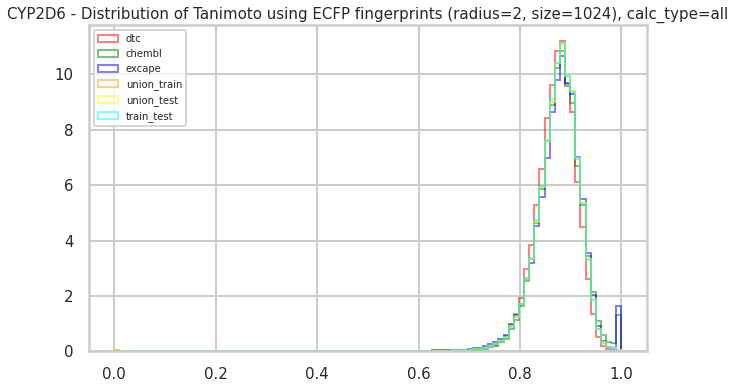

In [35]:
import scipy.stats as stats

#plot tanimoto distribution
fig, ax = plt.subplots(figsize = (10,6))
fontsize=15
#plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

bins = np.linspace(0, 1, 100)

plt.hist(tani_dists_dtc1, bins, alpha=0.5, label='dtc', color='r', histtype=u'step', density=True)
plt.hist(tani_dists_chembl1, bins, alpha=0.5, label='chembl', color='g', histtype=u'step', density=True)
plt.hist(tani_dists_excape1, bins, alpha=0.5, label='excape', color='b', histtype=u'step', density=True)

plt.hist(tani_dists_union_test1, bins, alpha=0.5, label='union_train', color='orange', histtype=u'step', density=True)
plt.hist(tani_dists_union_test1, bins, alpha=0.5, label='union_test', color='yellow', histtype=u'step', density=True)
plt.hist(tani_dists_between_train_test1, bins, alpha=0.5, label='train_test', color='cyan', histtype=u'step', density=True)

plt.legend(loc='upper left', prop={'size': 10})
plt.title(target.upper()+ " - Distribution of Tanimoto using ECFP fingerprints (radius=2, size=1024), calc_type=all")
plt.show()

In [36]:
union_train_df.pIC50.min(), union_train_df.pIC50.max()

(1.4431143483494877, 10.0)

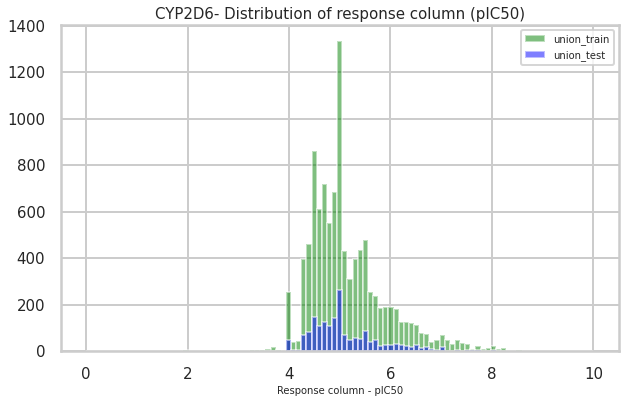

In [37]:
#plot pIC50 distribution
import matplotlib.pyplot as mp
fig, ax = plt.subplots(figsize = (10,6))
fontsize=15
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
bins = np.linspace(0, 10, 100)

plt.hist(union_train_df['pIC50'].to_numpy(), bins, alpha=0.5, label='union_train', color='g')
plt.hist(union_test_df['pIC50'].to_numpy(), bins, alpha=0.5, label='union_test', color='b')

plt.legend(loc='upper right', prop={'size': 10})
plt.title(target.upper()+ "- Distribution of response column (pIC50)")
plt.xlabel("Response column - pIC50", fontsize=10)
plt.show()

In [38]:
from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

def draw_venn3(a,b,c, labels, title):
    A = set(a)
    B = set(b)
    C = set(c)
    
    AB_overlap = A & B  #compute intersection of set A & set B
    AC_overlap = A & C
    BC_overlap = B & C
    ABC_overlap = A & B & C
    A_rest = A - AB_overlap - AC_overlap #see left graphic
    B_rest = B - AB_overlap - BC_overlap
    C_rest = C - AC_overlap - BC_overlap
    AB_only = AB_overlap - ABC_overlap   #see right graphic
    AC_only = AC_overlap - ABC_overlap
    BC_only = BC_overlap - ABC_overlap
    
    sets = Counter()               #set order A, B, C   
    sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
    sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
    sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
    sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
    sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
    sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
    sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
    
    total = len(A.union(B).union(C))
    
    labels = labels 
    plt.figure(figsize=(7,7)) 
    font1 = {'size':15} # use for title
    font2 = {'size': 12} # use for labels
    plt.rc('font', **font2) # sets the default font 
    ax = plt.gca() 
    #venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)
    venn3(subsets=sets, 
          set_labels=labels, 
          ax=ax,
          set_colors=('red','green','blue'),
          alpha=0.7, 
          subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
         );
    
    plt.title(title, fontdict=font1)
    plt.show()


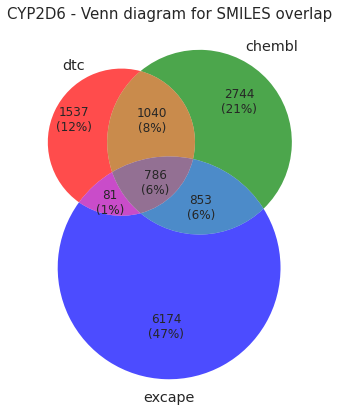

In [39]:
#venn2([set(dtc),set(dtc_test)], ('dtc', 'dtc_test'));
#venn2([set(excape),set(excape_test)], ('excape', 'excape_test'));
#plt.title(target.upper())
draw_venn3(dtc, chembl, excape, ('dtc', 'chembl','excape'), title=target.upper()+' - Venn diagram for SMILES overlap');

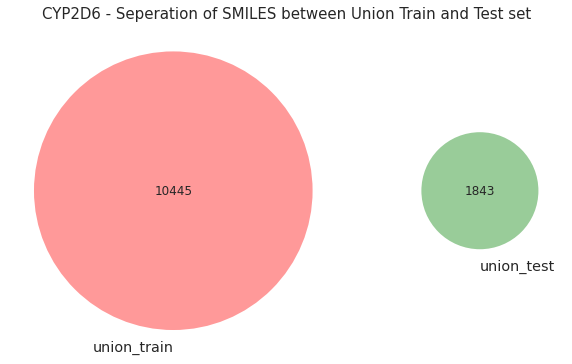

In [40]:
# Plot venn2 distribution 
dlst = [set(union_train),set(union_test)]
fig = plt.figure();
venn2(dlst, ('union_train', 'union_test'))
plt.title(target.upper()+" - Seperation of SMILES between Union Train and Test set");
#fig.savefig(root_dir + 'Plots/'+gene+'_union_venn.png')

In [ ]:
# root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'

# genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
# #gene = 'CYP2C9'
# for gene in genes:
#     home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'
    
#     union_train_df = pd.read_csv(home_dir + gene.lower() + '_union_trainset_base_smiles.csv')
#     union_train = union_train_df['base_rdkit_smiles'].to_list()
#     print(len(union_train), len(set(union_train)))

#     union_test_df = pd.read_csv(home_dir + gene.lower() + '_union_testset_base_smiles.csv')
#     union_test = union_test_df['base_rdkit_smiles'].to_list()
#     print(len(union_test), len(set(union_test)))
    
#     # Plot venn2 distribution 
#     dlst = [set(union_train),set(union_test)]
#     fig = plt.figure()
#     venn2(dlst, ('union_train', 'union_test'))
#     plt.title(gene)
#     fig.savefig(root_dir + 'Plots/'+gene+'_union_venn.png')

In [ ]:
# #genes = ['CHRM1', 'CHRM2', 'CHRM3', 'CYP2C9', 'CYP2D6', 'CYP3A4', 'HRH1', 'KCNH2', 'PIK3CG'] #PIK3CG - model file name problem
# gene = 'PIK3CG'

In [ ]:
# root_dir = '/home/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
# home_dir = root_dir + gene.upper() + '-ampl-1.1.0/'

# union_train_df = pd.read_csv(home_dir + gene.lower() + '_union_trainset_base_smiles.csv')
# union_train = union_train_df['base_rdkit_smiles'].to_list()
# print(len(union_train), len(set(union_train)))

# union_test_df = pd.read_csv(home_dir + gene.lower() + '_union_testset_base_smiles.csv')
# union_test = union_test_df['base_rdkit_smiles'].to_list()
# print(len(union_test), len(set(union_test)))

# column = 'pIC50'
# num_bins = 20
# units = 'NM'
# filepath = ''

# # Using the summarize_data submodule, we are going to compile a set of data summarization tools to calculate several descriptive features
# # These features include: column, num_bins, title, units, filepath, and data
# curate_data.summarize_data(column, num_bins, gene+'_union_train', units, filepath, union_train_df)
# #fig.savefig(root_dir+'Plots/'+ title+'_union_train_summarize.png')
# curate_data.summarize_data(column, num_bins, gene+'_union_test', units, filepath, union_test_df)
# #fig.savefig(root_dir+'Plots/'+ title+'_union_test_summarize.png')

# Look at correlation plots & umaps of training data


In [42]:
import umap
dset_key = home_dir + target.lower() + '_union_trainset_base_smiles.csv'
dp.diversity_plots(dset_key = dset_key, 
                   datastore = False, 
                   response_col = 'pIC50',
                   #max_for_mcs = 100, 
                   title_prefix = target.upper()+'_union_train_',
                   #out_dir = root_dir+'Plots/',
                   id_col = 'compound_id',
                   smiles_col = 'base_rdkit_smiles',
                   is_base_smiles = True)

Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
dset_key = home_dir + target.lower() + '_union_testset_base_smiles.csv'
dp.diversity_plots(dset_key = dset_key, 
                   datastore = False, 
                   response_col = 'pIC50',
                   #max_for_mcs = 100, 
                   title_prefix = target.upper()+'_union_test_',
                   #out_dir = root_dir+'Plots/',
                   id_col = 'compound_id',
                   smiles_col = 'base_rdkit_smiles',
                   is_base_smiles = True)

# PCA on Tanimoto matrix 

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# %matplotlib inline
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(tani_dists_dtc)
pca_result

array([[ 0.04655004,  0.22809226, -0.47894451],
       [-0.74583821,  1.03211697, -0.98410261],
       [-0.01400153, -0.37978214,  0.20802588],
       ...,
       [-0.70934459, -0.43675695,  0.62720516],
       [ 1.33364732,  0.51197213, -0.56203242],
       [-0.30234349,  0.44988071, -0.58468829]])

In [44]:
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df.head(2)

,pca-one,pca-two,pca-three
0,0.046550,0.228092,-0.478945
1,-0.745838,1.032117,-0.984103


In [45]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.round(explained_variance,2)
explained_variance

array([0.16, 0.06, 0.05])

In [47]:
# Plot in 2D
rndperm = np.random.permutation(df.shape[0])

# plt.figure(figsize=(10,6))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     #hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df.loc[rndperm,:],
#     legend="full",
#     alpha=0.5
# );

/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


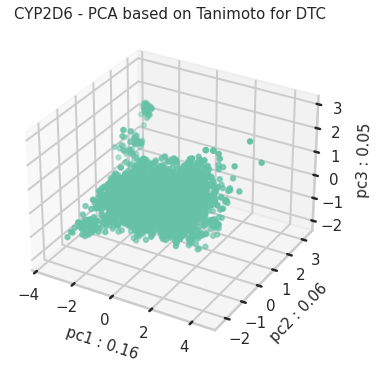

In [49]:
ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
);
ax.set_xlabel('\npc1 : '+str(explained_variance[0]), fontsize=15)
ax.set_ylabel('\npc2 : '+str(explained_variance[1]), fontsize=15)
ax.set_zlabel('\npc3 : '+str(explained_variance[2]), fontsize=15)
plt.title(target.upper()+" - PCA based on Tanimoto for DTC")
plt.show()

/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


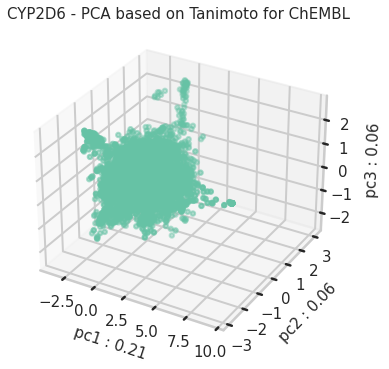

In [51]:
#tani_dists_chembl1 = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=chembl_df['rdkit_smiles'])

pca = PCA(n_components = 3)
pca_result = pca.fit_transform(tani_dists_chembl)

df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

explained_variance = pca.explained_variance_ratio_
explained_variance = np.round(explained_variance,2)

ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
);
ax.set_xlabel('\npc1 : '+str(explained_variance[0]), fontsize=15)
ax.set_ylabel('\npc2 : '+str(explained_variance[1]), fontsize=15)
ax.set_zlabel('\npc3 : '+str(explained_variance[2]), fontsize=15)
plt.title(target.upper()+" - PCA based on Tanimoto for ChEMBL")
plt.show()

/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  from ipykernel import kernelapp as app


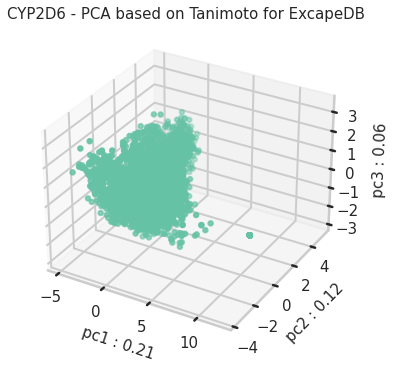

In [52]:
#tani_dists_excape1 = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=excape_df['rdkit_smiles'].apply(curate_data.base_smiles_from_smiles))


pca = PCA(n_components = 3)
pca_result = pca.fit_transform(tani_dists_excape)

df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

explained_variance = pca.explained_variance_ratio_
explained_variance = np.round(explained_variance,2)

ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
);
ax.set_xlabel('\npc1 : '+str(explained_variance[0]), fontsize=15)
ax.set_ylabel('\npc2 : '+str(explained_variance[1]), fontsize=15)
ax.set_zlabel('\npc3 : '+str(explained_variance[2]), fontsize=15)
plt.title(target.upper()+" - PCA based on Tanimoto for ExcapeDB")
plt.show()

/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


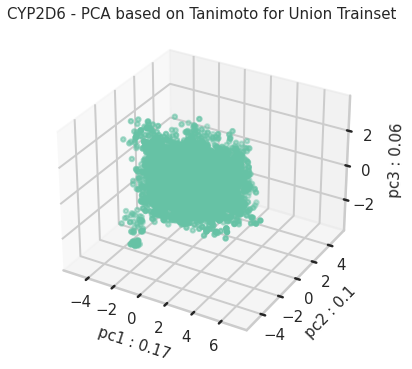

In [53]:
#tani_dists_union_train1 = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=union_train_df['base_rdkit_smiles'].apply(curate_data.base_smiles_from_smiles))

pca = PCA(n_components = 3)
pca_result = pca.fit_transform(tani_dists_union_train)

df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

explained_variance = pca.explained_variance_ratio_
explained_variance = np.round(explained_variance,2)

ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
);
ax.set_xlabel('\npc1 : '+str(explained_variance[0]), fontsize=15)
ax.set_ylabel('\npc2 : '+str(explained_variance[1]), fontsize=15)
ax.set_zlabel('\npc3 : '+str(explained_variance[2]), fontsize=15)
plt.title(target.upper()+" - PCA based on Tanimoto for Union Trainset")
plt.show()

/home/sarkart4/miniconda3/envs/ampl-1.4.0/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  from ipykernel import kernelapp as app


KeyError: '[1850, 2064, 3323, 3111, 3146, 2609, 2787, 3443, 3463, 3056, 3003, 2567, 2952, 2564, 2852, 2236, 2829, 2314, 3120, 3290, 2634, 2100, 3527, 2162, 3257, 3766, 2293, 2460, 2875, 3605, 3526, 2934, 3458, 2004, 2247, 1845, 1902, 1976, 2534, 3373, 3417, 3777, 2010, 2311, 2791, 3292, 3625, 2954, 2869, 2959, 3438, 3688, 2920, 3400, 1929, 2923, 2672, 3685, 3772, 2774, 2702, 2195, 2070, 2583, 2909, 1912, 2555, 3698, 3233, 2192, 2874, 3471, 3704, 3243, 2217, 3473, 3296, 3271, 2377, 2602, 2206, 3595, 3608, 3328, 2061, 2620, 3550, 3342, 2826, 2399, 2159, 3683, 3650, 1989, 3639, 3287, 1936, 3027, 3000, 2485, 3172, 3592, 2007, 2050, 3756, 3422, 3810, 2451, 3529, 1895, 2586, 2233, 3427, 1862, 2085, 2190, 1905, 2712, 3344, 1848, 3413, 2086, 2570, 2288, 2174, 3431, 3423, 2156, 2800, 1945, 2364, 3407, 2258, 2472, 3059, 3745, 2306, 1871, 2750, 2665, 3739, 3519, 2892, 3626, 2912, 2102, 2336, 2358, 2149, 3610, 2896, 3658, 3474, 1864, 2666, 2887, 2299, 1919, 2910, 3016, 2632, 2278, 2552, 2556, 2587, 2898, 1861, 1879, 3620, 3491, 3325, 2924, 2729, 3285, 2538, 2157, 2977, 2859, 2141, 3318, 3386, 3785, 2087, 2492, 2091, 2418, 2325, 2707, 3187, 2025, 2569, 2429, 2720, 3372, 3525, 3363, 2841, 2647, 2204, 2453, 1881, 3747, 3274, 2350, 3301, 2462, 1928, 3077, 3245, 3322, 1999, 2424, 2574, 3696, 2144, 3587, 3571, 3356, 1960, 3564, 2999, 2077, 3151, 2308, 3741, 2908, 2818, 2285, 2002, 3448, 3508, 2318, 2638, 1938, 2154, 2019, 3093, 3297, 3371, 2521, 3125, 1925, 2495, 3675, 1885, 2926, 3358, 3201, 2679, 2366, 3313, 2295, 3337, 3266, 3477, 2059, 3418, 3152, 2427, 3629, 3360, 3798, 2082, 2347, 2322, 2585, 2027, 2886, 1930, 3709, 2166, 2930, 3686, 2701, 3557, 3725, 2705, 3433, 2180, 2540, 2518, 2040, 2940, 3238, 3321, 2436, 2891, 2132, 2268, 3541, 3332, 2747, 3472, 2728, 2253, 2671, 3249, 2976, 2766, 2777, 2985, 3069, 2759, 2153, 3101, 2508, 2803, 2614, 2727, 3094, 2150, 2520, 2442, 3279, 3582, 2092, 2974, 2604, 2176, 3479, 3260, 3032, 3183, 2685, 1873, 3494, 3229, 2629, 3787, 2234, 2640, 2546, 2646, 3159, 3679, 1961, 3235, 3515, 3678, 3096, 2967, 2708, 3197, 3058, 2981, 3188, 3829, 2093, 2615, 2739, 2210, 1949, 3087, 3405, 2601, 2226, 3655, 2975, 2933, 3270, 2375, 2428, 3148, 3095, 3789, 1997, 3621, 2519, 3666, 2688, 3194, 3570, 3009, 2494, 3806, 1888, 3757, 2481, 3170, 2324, 3499, 2183, 3347, 3796, 3307, 1911, 2066, 2960, 2219, 2170, 2737, 3754, 2413, 3512, 2589, 2152, 3394, 3825, 2757, 3682, 2138, 3480, 2218, 3758, 2588, 3736, 2454, 1904, 2383, 3317, 2341, 3359, 2354, 1844, 2333, 2425, 1970, 3466, 3008, 3283, 2438, 3375, 3599, 2675, 3505, 2752, 2669, 1982, 2796, 3583, 3357, 3160, 2249, 3495, 1923, 2026, 2594, 2663, 2610, 3584, 3732, 1843, 2430, 2400, 3137, 1939, 3014, 2851, 2846, 3728, 2921, 2402, 2936, 3041, 3690, 1909, 2835, 2471, 2581, 2832, 2008, 2836, 3743, 2568, 2868, 3310, 2501, 2119, 2731, 2880, 2825, 3254, 3618, 2916, 3010, 2271, 2420, 2730, 3751, 1872, 2623, 3055, 2863, 3695, 2330, 3432, 3773, 2074, 1907, 2103, 2755, 3333, 3379, 2096, 2222, 3314, 2244, 2649, 2345, 3496, 2023, 3821, 2565, 1891, 2919, 2922, 2935, 3240, 3258, 2302, 2848, 2704, 2130, 2075, 3517, 3106, 2109, 3207, 1868, 1913, 3677, 2867, 2309, 2267, 2668, 3140, 2284, 3208, 2979, 2081, 2239, 2735, 2448, 3195, 3514, 2828, 2401, 3804, 2133, 1998, 3102, 1893, 3138, 2355, 2112, 3694, 2307, 2513, 3075, 2592, 2817, 2104, 1935, 3589, 2362, 3163, 2631, 2542, 3421, 2582, 3566, 2636, 2491, 3150, 3340, 3590, 2261, 2466, 2545, 2650, 3786, 1947, 3390, 2500, 2343, 2716, 3469, 3661, 2339, 2334, 2882, 2748, 1863, 2514, 2346, 1856, 2385, 3376, 3338, 3256, 2037, 2177, 2035, 2682, 2013, 3035, 2179, 2958, 2317, 2260, 3672, 2369, 2108, 2433, 3377, 2441, 2033, 3470, 2243, 2042, 3734, 3533, 2283, 3289, 3066, 3722, 2593, 2808, 2788, 2961, 2458, 3569, 3636, 3597, 2264, 3001, 3606, 2135, 3561, 2503, 2437, 3593, 3714, 3025, 3130, 3162, 3353, 3424, 3638, 3142, 2844, 3410, 1964, 2113, 2784, 2576, 3346, 1897, 2304, 2884, 2084, 1966, 3277, 3435, 2479, 3017, 3730, 3070, 2393, 3250, 2211, 2847, 3752, 2833, 2978, 3645, 3350, 2098, 2088, 2806, 2076, 3203, 2703, 2164, 2251, 2996, 3113, 2421, 2598, 2328, 1898, 3155, 2034, 2656, 3713, 2445, 3220, 2998, 3199, 3651, 2440, 3558, 2009, 2315, 3781, 1855, 3118, 3598, 3718, 3071, 2907, 2778, 2497, 2756, 3419, 2938, 2883, 2373, 2072, 2531, 2987, 1880, 2371, 2579, 2232, 3387, 3037, 1965, 3513, 2127, 2795, 2904, 3632, 2199, 3057, 3425, 2681, 2745, 2020, 3710, 1874, 2966, 2691, 2749, 2714, 3414, 3562, 2332, 2120, 2221, 3157, 3729, 3381, 2048, 3818, 2815, 1915, 2018, 2807, 3339, 2991, 1853, 3305, 3053, 2490, 1921, 3239, 3011, 2182, 2838, 2231, 3411, 3832, 3273, 2725, 2724, 3039, 3361, 3248, 3212, 2340, 2216, 3145, 3530, 3498, 3348, 3190, 3454, 2465, 1974, 2902, 3300, 2172, 2622, 2227, 2698, 1988, 3230, 2480, 2864, 2768, 2971, 3700, 1934, 2535, 2530, 2710, 3268, 3123, 2301, 2412, 1920, 3043, 3110, 2558, 3826, 3175, 2532, 3475, 1952, 3086, 2197, 3309, 2272, 3522, 3548, 3374, 2250, 2005, 3652, 2674, 3801, 2554, 2830, 3600, 2407, 2560, 2405, 3656, 2434, 3022, 3354, 1956, 2367, 2469, 2502, 2925, 2516, 3673, 2732, 3040, 3761, 1927, 3049, 2504, 3703, 2625, 2241, 3074, 1865, 3453, 3062, 1962, 3397, 2713, 2606, 2694, 2950, 3681, 2607, 2654, 2361, 2939, 2905, 2475, 1884, 2392, 3586, 1854, 3707, 2276, 2380, 2063, 2173, 2719, 3174, 2054, 3408, 2079, 1878, 2228, 3549, 2444, 3536, 2873, 3202, 1900, 3691, 2207, 3026, 1847, 2114, 2246, 3303, 3485, 3456, 2754, 2422, 2068, 2506, 2715, 3341, 2810, 2776, 3546, 2578, 3668, 3393, 2984, 3128, 3615, 2435, 2633, 2187, 2753, 2642, 1950, 2900, 3793, 3588, 2973, 3594, 3383, 1860, 2760, 3209, 3326, 3574, 2550, 3824, 3591, 2193, 3531, 1926, 2687, 3412, 2635, 2779, 2349, 2949, 3654, 3782, 2145, 3800, 2913, 2781, 2906, 2741, 2171, 3345, 2617, 2360, 2487, 2805, 2265, 3449, 2945, 3065, 1892, 2944, 2733, 1876, 2533, 2344, 2811, 3577, 1946, 3216, 2168, 2467, 1858, 2110, 3281, 2184, 3614, 1958, 3031, 1948, 2819, 3103, 2090, 2286, 3457, 2000, 2395, 3641, 2439, 3048, 2879, 3742, 3719, 3178, 2536, 2443, 2721, 2476, 3198, 2895, 2612, 2645, 2078, 2073, 2045, 2509, 2897, 3520, 3018, 2561, 2706, 3191, 3779, 2043, 3671, 3500, 2388, 2858, 3706, 1957, 3799, 2553, 3497, 3097, 2417, 3819, 2321, 3047, 1918, 2862, 3033, 2693, 3573, 2772, 2929, 1995, 2282, 3790, 1972, 1906, 2186, 3144, 3263, 2357, 3189, 2696, 3367, 3486, 3398, 1969, 3827, 3627, 3510, 2802, 1985, 2289, 3502, 3797, 3619, 2792, 2941, 3015, 3488, 3320, 2798, 2298, 1983, 3282, 3126, 3021, 2202, 2359, 2030, 3434, 2055, 2780, 3355, 3506, 2889, 2457, 2118, 2167, 3653, 3689, 3067, 3429, 1955, 3259, 2820, 2563, 3108, 3551, 3299, 2213, 2762, 3763, 2089, 3578, 2012, 2861, 2342, 3149, 3215, 2300, 1849, 2643, 2327, 2248, 3723, 3450, 2209, 2374, 2722, 2165, 2160, 2870, 2894, 2151, 2522, 2331, 3051, 1896, 2414, 2932, 3555, 2057, 2608, 3649, 2294, 2771, 2181, 3119, 2948, 2575, 2031, 3200, 3366, 3312, 2384, 2559, 3167, 2403, 2459, 1867, 2624, 3811, 2769, 2148, 1996, 3136, 3384, 3538, 2840, 3642, 3420, 3755, 1993, 2673, 3633, 3078, 3489, 3007, 3135, 3616, 2411, 2990, 3100, 3222, 3684, 3452, 2689, 3415, 2951, 3090, 3385, 3492, 3759, 3158, 2095, 3255, 2203, 3623, 3545, 3631, 3628, 2188, 3670, 3760, 2039, 2517, 2353, 3805, 2046, 2718, 2947, 1990, 3601, 2032, 2044, 3483, 3280, 1875, 2111, 2175, 3291, 3794, 3524, 2256, 3244, 1851, 2775, 3224, 3236, 2789, 2751, 2827, 1973, 2953, 3462, 3445, 3560, 3544, 2676, 3461, 2291, 2619, 3242, 1877, 3013, 2316, 3247, 3568, 3523, 2449, 2387, 3426, 2878, 3828, 2212, 3395, 2305, 2544, 3613, 2854, 3028, 2590, 1987, 2670, 3141, 3193, 2600, 2881, 3542, 2198, 3460, 2280, 2287, 2618, 2263, 3437, 3814, 3717, 3362, 3023, 2432, 2526, 2404, 2106, 3721, 2169, 3507, 3185, 2794, 1883, 2834, 2855, 2982, 3622, 2196, 1870, 2523, 2140, 2785, 3225, 2690, 3808, 2697, 3098, 2813, 3050, 3693, 3261, 2016, 2356, 2860, 3727, 3643, 2857, 3232, 2235, 2562, 3351, 3253, 2337, 3792, 3030, 3324, 3748, 2527, 1931, 2240, 2447, 2201, 2525, 2528, 2547, 2426, 1943, 2822, 2597, 3487, 1953, 3774, 3715, 2684, 2131, 2637, 3251, 2001, 2107, 3029, 2473, 3702, 3329, 2571, 2006, 2995, 2269, 2060, 2577, 3205, 3788, 3302, 2477, 2394, 2069, 3012, 2856, 3335, 2843, 3708, 3663, 2003, 3820, 2205, 2128, 3306, 3803, 2011, 2478, 3072, 2252, 3269, 3228, 2888, 2537, 3165, 3831, 2994, 2937, 2230, 2901, 3082, 3182, 2942, 3133, 3802, 1992, 3139, 3579, 2147, 3559, 2877, 3511, 3535, 1869, 1975, 3646, 3572, 3117, 2408, 3267, 2281, 1971, 2229, 3659, 3503, 3006, 1859, 3396, 2655, 3617, 3711, 3716, 2379, 3575, 3331, 2423, 3206, 2764, 2080, 3044, 3404, 2326, 3567, 3634, 3099, 3166, 2296, 3516, 1980, 2821, 2885, 3388, 3699, 3737, 2918, 3769, 2801, 2208, 1941, 2972, 3609, 3822, 2692, 1922, 2468, 2627, 2699, 3054, 3539, 2529, 3816, 2695, 3665, 1944, 3409, 2653, 3223, 3156, 2049, 3073, 3204, 2997, 3504, 2022, 3726, 2914, 2865, 2097, 3352, 2742, 2122, 2823, 2842, 2956, 3265, 2292, 3122, 3481, 2505, 3416, 2189, 3554, 2266, 2041, 2584, 3184, 2277, 3002, 2903, 3143, 2274, 2782, 2452, 2928, 2279, 2573, 3767, 3052, 3604, 3186, 3231, 2853, 1937, 3740, 2524, 3402, 3364, 3164, 3019, 3744, 3334, 3196, 3089, 2463, 3180, 3459, 3768, 3252, 2628, 2723, 2566, 2470, 1886, 3540, 3660, 2596, 2580, 2743, 3657, 3315, 3226, 2115, 2446, 2657, 3246, 3083, 1959, 2146, 2824, 1951, 3428, 2616, 3532, 2626, 2390, 3316, 3552, 2893, 2220, 3241, 2680, 2740, 2510, 2065, 2036, 3060, 3380, 3731, 2726, 3084, 2242, 2017, 3770, 3576, 2386, 2965, 2319, 3085, 2717, 2238, 2700, 2734, 2143, 1932, 2644, 3537, 2376, 2303, 3042, 2389, 3298, 3705, 3611, 2225, 2024, 2983, 2711, 3349, 3467, 3446, 2348, 2709, 3284, 2028, 1857, 3775, 3169, 3749, 3005, 2105, 2310, 2790, 2970, 3061, 3674, 2551, 3154, 2257, 3687, 3336, 3534, 3024, 2052, 3036, 2641, 3076, 2410, 3211, 2312, 2194, 2677, 3046, 2200, 3092, 1917, 2662, 2397, 2223, 3276, 2605, 2014, 2071, 1924, 3817, 3669, 3815, 2943, 2648, 3776, 2313, 2416, 3262, 2117, 3181, 1954, 3701, 3442, 3444, 2837, 2489, 2191, 2988, 2431, 2658, 3234, 2993, 2613, 2773, 2871, 2498, 2237, 2814, 3585, 2816, 2396, 3091, 2652, 2320, 3104, 3038, 2273, 1866, 1916, 2549, 3809, 2021, 3171, 3278, 3369, 3293, 3116, 2876, 2051, 2161, 1963, 3478, 3795, 2660, 3735, 3596, 3161, 3275, 3733, 3272, 2254, 2664, 3602, 3771, 2661, 2163, 3764, 2101, 2464, 3079, 3603, 3464, 3556, 3812, 2543, 1981, 2969, 3168, 3624, 2890, 2056, 2962, 2511, 2866, 2493, 2911, 2185, 3368, 2659, 2931, 2455, 3088, 3173, 2038, 3484, 1889, 3401, 2047, 1914, 3068, 3153, 2507, 2915, 3365, 3441, 2398, 3109, 3563, 1991, 3447, 2678, 3482, 3330, 3468, 2483, 3490, 2484, 2290, 1890, 3509, 2746, 2763, 3662, 3680, 2067, 3227, 2992, 3121, 1910, 2599, 2686, 3370, 3581, 2809, 3430, 3080, 3630, 3692, 2539, 2786, 2259, 3382, 2738, 3308, 2094, 3295, 2989, 3565, 2461, 3131, 1901, 3647, 3304, 3112, 2083, 3697, 3807, 3378, 3192, 3833, 1846, 2758, 2603, 3392, 2496, 2591, 2761, 3179, 2368, 2245, 2121, 3115, 1986, 2155, 2872, 2899, 3640, 2224, 3147, 2474, 1887, 3455, 3436, 2099, 3218, 1984, 2450, 3389, 2015, 2963, 2667, 3753, 3830, 3518, 2338, 3750, 2134, 2297, 3237, 2512, 3580, 2363, 2630, 1933, 2611, 2849, 2365, 3294, 2124, 3288, 2946, 1979, 2137, 3129, 3724, 2927, 3493, 2029, 3034, 3221, 3217, 1967, 2621, 2651, 2351, 2557, 2372, 2917, 2548, 3311, 2378, 3020, 3720, 3676, 1968, 3762, 2812, 3612, 2482, 3219, 2335, 2370, 2845, 2142, 3543, 3644, 2639, 3176, 3045, 2178, 2799, 3327, 2744, 2053, 2980, 3635, 2415, 2957, 2158, 3712, 3319, 3127, 2406, 3465, 2499, 2683, 3521, 3813, 2986, 2419, 2136, 3391, 2381, 3134, 2214, 1852, 3547, 1903, 1908, 3607, 2488, 1977, 2275, 3063, 3124, 1894, 2515, 2955, 3439, 2964, 2541, 3765, 2352, 2129, 2126, 3553, 3784, 3406, 1942, 3780, 2139, 3214, 3501, 2765, 3403, 2831, 3648, 2783, 3528, 2062, 2595, 3114, 2486, 2767, 3210, 2797, 2572, 2839, 1882, 3667, 3264, 1940, 2262, 2270, 3105, 3132, 3823, 2736, 2968, 2456, 2255, 3004, 3213, 1899, 3664, 3081, 2125, 3399, 2329, 2793, 2770, 3778, 3107, 2804, 2215, 2382, 3286, 2391, 2123, 2116, 3637, 1978, 3738, 3064, 3451, 3746, 3440, 2058, 2409, 3791, 3476, 3343, 3177, 1994, 2323, 3783, 2850] not in index'

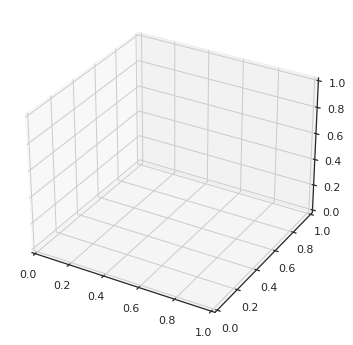

In [128]:
#tani_dists_union_test1 = cd.calc_dist_smiles(feat_type='ECFP', dist_met='tanimoto', calc_type='all', smiles_arr1=union_test_df['base_rdkit_smiles'])


pca = PCA(n_components = 3)
pca_result = pca.fit_transform(tani_dists_union_test)

df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

explained_variance = pca.explained_variance_ratio_
explained_variance = np.round(explained_variance,2)

ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
);
ax.set_xlabel('\npc1 : '+str(explained_variance[0]), fontsize=15)
ax.set_ylabel('\npc2 : '+str(explained_variance[1]), fontsize=15)
ax.set_zlabel('\npc3 : '+str(explained_variance[2]), fontsize=15)
plt.title(target.upper()+" - PCA based on Tanimoto for Union Testset")
plt.show()

# UMAP on Union Test (have 'active' column) 

In [133]:
#import umap
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [139]:
union_test_df.head(5)
#union_test_df.active.value_counts

,base_rdkit_smiles,compound_id,pIC50,relation,active
0,S=C(Nc1ccc2cn[nH]c2c1)Nc1ccc2cn[nH]c2c1,OTJWJLLGPAFTIP-KNLWZTMUNA-N,5.700000,NaN,1
1,Cc1[nH]c2ccccc2c1C(c1ccccn1)N1CCC(C)CC1,NBKDMBGWUXYCJB-UHFFFAOYNA-N,4.600000,<,0
2,CC(C)(Cc1c[nH]c2ccc(Cl)cc12)NCCOc1ccccc1OCC1CC1,XLZHXAXXJVKTFM-UHFFFAOYNA-N,7.000000,NaN,1
3,CCN(CC)C(=O)CN1CCCC(c2nc3ccccc3n2Cc2ccc(F)cc2)C1,CHEMBL1935432,5.720831,NaN,1
4,NC(=NCc1ccc(Cl)cc1)SCCCc1c[nH]cn1,UCAIEVHKDLMIFL-QDYITYEQNA-N,4.900000,<,0


1843

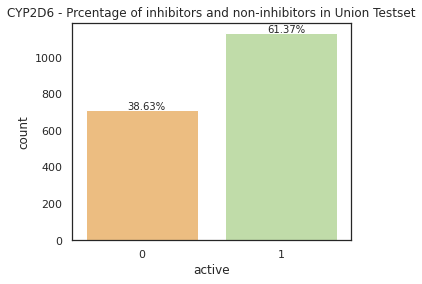

In [198]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(5,4)})
ax = sns.countplot(data=union_test_df, x="active", palette='Spectral')
total = len(union_test_df["active"])
display(total)
for p in ax.patches:
    x = p.get_x()+0.3      #adjust the numbers (higher numbers = to the right, lower = to the left)
    height = p.get_height()+0.5      #adjust the numbers (higher numbers = up, lower = down)
    percentage = ("{0:.2f}".format((p.get_height()/total)*100)+'%')
    ax.text(x, height, percentage, fontsize=10)
#plt.xlabel('activity')
plt.title(target.upper()+' - Prcentage of inhibitors and non-inhibitors in Union Testset', loc='center')
plt.show()

# UMAP on Union Train

In [111]:
reducer = umap.UMAP(random_state=45)
#reducer.fit(union_test_df[['pIC50', 'active']])
reducer.fit(tani_dists_union_train)

UMAP(random_state=45)

In [112]:
#embedding = reducer.transform(union_test_df[['pIC50', 'active']])
embedding = reducer.transform(tani_dists_union_train)

# Verify that the result of calling transform is idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
display(embedding.shape)

(10445, 2)

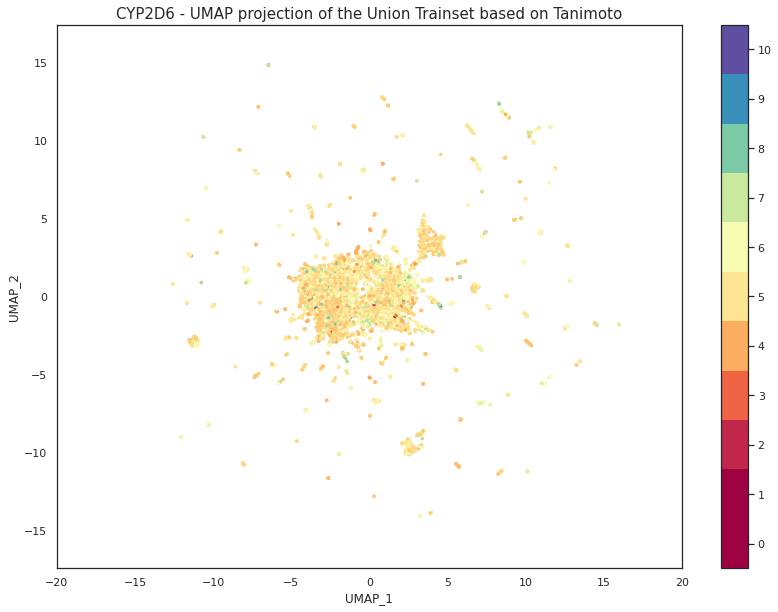

In [121]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=union_train_df['pIC50'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar(boundaries=np.arange(12)-0.5).set_ticks(np.arange(11))
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title(target.upper()+ ' - UMAP projection of the Union Trainset based on Tanimoto', fontsize=15);

# UMAP on Union Test

In [122]:
reducer = umap.UMAP(random_state=45)
reducer.fit(tani_dists_union_test)
embedding = reducer.transform(tani_dists_union_test)
# Verify that the result of calling transform is idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
display(embedding.shape)

(1843, 2)

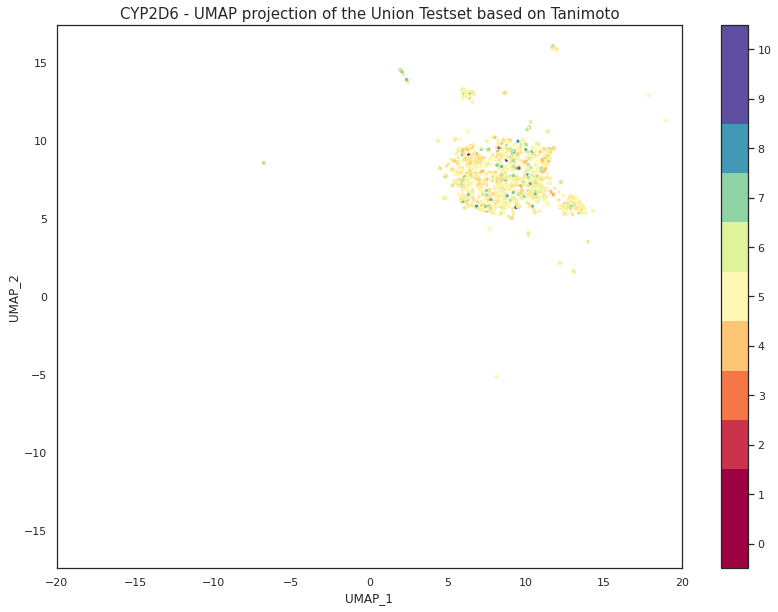

In [126]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=union_test_df['pIC50'],cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar(boundaries=np.arange(12)-0.5).set_ticks(np.arange(11))
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title(target.upper()+ ' - UMAP projection of the Union Testset based on Tanimoto', fontsize=15);

# t-SNE

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = union_train_df.copy(deep=True)
df["y"] = df['pIC50']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="union_train_df T-SNE projection")

NameError: name 'x' is not defined